In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

#scikit-learnについてくるサンプルデータ
#ボストン住宅価格データセット
boston = load_boston()

# boston.data: 説明変数
# boston.target: 目的変数
# boston.feature_names: 説明変数名

df = pd.DataFrame(boston.data,columns=boston.feature_names )
df["MEDV"] = boston.target

print(boston.DESCR)               #データの説明


display(df)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


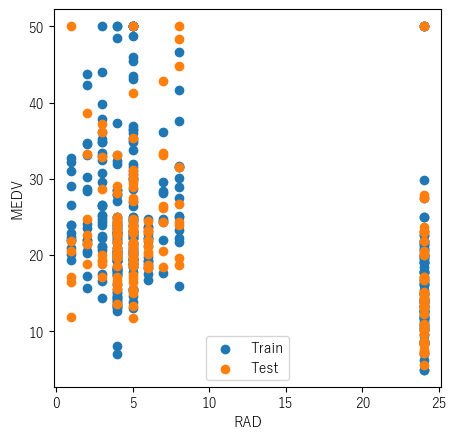

Gradient a = -0.414139
Intercept b = 26.618965


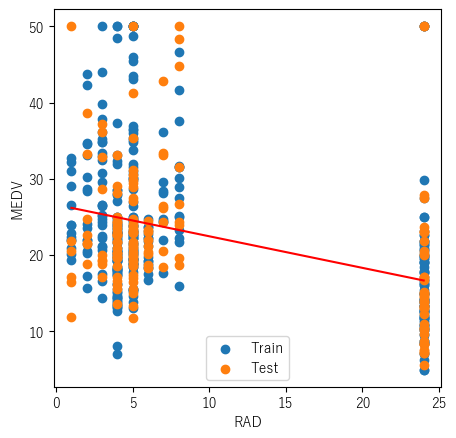

MAE for train data= 6.2190620887060755
MAE for test data= 6.252318181514989


In [4]:
#単回帰モデル
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt



# 説明変数を「RAD:環状高速道路へのアクセスしやすさ」, 目的変数を「MEDV:価格」としてデータを取り出す
x = df["RAD"]
y = df["MEDV"]
# 列ベクトルに変換
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)


#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#学習データをプロット
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.scatter(x_train,y_train,label="Train")
plt.scatter(x_test,y_test,label="Test")
plt.legend()
plt.show()

#線形回帰モデル
model = LinearRegression()
 
# モデルの学習
model.fit(x_train, y_train)

# 係数の確認
a = model.coef_[0,0]
b = model.intercept_[0]
print("Gradient a = %f" % a)
print("Intercept b = %f" % b)


#データの上に、求まった単回帰モデルの直線を描画
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.scatter(x_train,y_train,label="Train")
plt.scatter(x_test,y_test,label="Test")
plt.plot([1,24],[1*a+b,24*a+b],color = "red")
plt.legend()
plt.show()

#学習データに対するMAE
y_pred = model.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)

#評価データに対するMAE
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)


,Name,Coefficients,Abs_Coefficients
6,DIS,13.682414,13.682414
8,TAX,10.648097,10.648097
9,PTRATIO,-5.922701,5.922701
7,RAD,-5.343538,5.343538
12,MEDV,4.779174,4.779174
11,LSTAT,3.945411,3.945411
5,AGE,-3.425412,3.425412
1,INDUS,-2.420995,2.420995
4,RM,2.238518,2.238518
0,CRIM,1.959391,1.959391


MAE for train data= 10.855370867322193
MAE for test data= 11.129156841470756


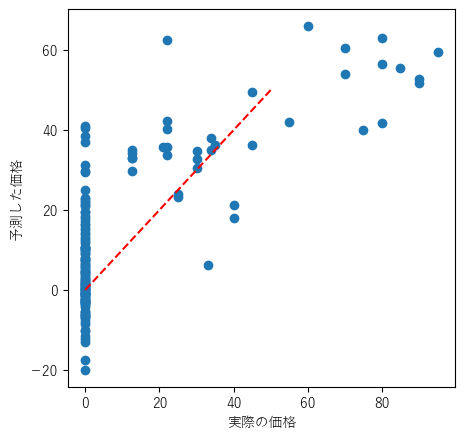

In [3]:
#重回帰モデル
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import ticker

#matplotlibで日本語を使う場合
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

# 説明変数は「ZN	25,000平方フィート以上の住居区画の割合」以外全て, 目的変数を「ZN	25,000平方フィート以上の住居区画の割合」としてデータを取り出す
x = df.drop('ZN', axis = 1)
y = df["ZN"].values

#データセットを学習データと評価データに分ける
#全体の30%をテストデータにする
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)

#回帰モデル
model = LinearRegression()
 
# モデルの学習
model.fit(x_train_std, y_train)



# 標準偏回帰係数
#標準偏回帰係数の大きさ（絶対値）順に並び替えて確認
display(pd.DataFrame({"Name":x.columns,"Coefficients":model.coef_,"Abs_Coefficients":np.abs(model.coef_)}).sort_values(by='Abs_Coefficients', ascending=False))

       
#学習データに対するMAE
y_pred = model.predict(x_train_std)
mae = mean_absolute_error(y_train, y_pred)
print("MAE for train data=",mae)

#評価データに対するMAE
x_test_std = sc.transform(x_test) #学習データを標準化したときのパラメータを使って評価データの標準化
y_pred = model.predict(x_test_std)
mae = mean_absolute_error(y_test, y_pred)
print("MAE for test data=",mae)


#実際の価格と予測した価格をプロット
fig = plt.figure(figsize=(5,5),dpi=100)
plt.xlabel('実際の価格')
plt.ylabel('予測した価格')
plt.scatter(y_test,y_pred)
plt.plot([0,50],[0,50],color="red",ls="--") #一致した場合にプロットが乗る直線
plt.show()


